In [22]:
# Importing libraries

In [23]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [24]:
# Set style for plots
plt.style.use('fivethirtyeight') 

In [25]:
!pwd

/Users/andreasdangaris/NeueFische/Module 5/EDA Project/da-EDA_project


## Simple EDA 

In [26]:
# Defining the dataframes and reading the respective csv's

In [27]:
df_order = pd.read_csv("data/order_data.csv", skiprows=1)
df_scan = pd.read_csv("data/order_process_data.csv")
df_cd = pd.read_csv("data/campaign_data.csv")
df_intern = pd.read_csv("data/intern_data_study.csv")

##### Changing Headers of all data sets in a pythonic way

In [28]:
df_order.columns = df_order.columns.str.replace(" ","_")
df_order.columns = df_order.columns.str.lower()
df_order.columns = df_order.columns.str.replace("/","_")
df_order.columns = df_order.columns.str.replace("-","_")

In [29]:
df_order.shape

(9994, 19)

In [30]:
df_intern.columns = df_intern.columns.str.replace(" ","_")
df_intern.columns = df_intern.columns.str.lower()
df_intern.head()

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,02/09/2019,03/09/2019
1,CA-2019-116540,02/09/2019,03/09/2019
2,CA-2019-129847,04/09/2019,04/09/2019
3,CA-2019-129630,04/09/2019,04/09/2019
4,CA-2019-106278,05/09/2019,06/09/2019


In [31]:
df_scan.columns = df_scan.columns.str.replace(" ","_")
df_scan.columns = df_scan.columns.str.lower()
df_scan.head()

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,3074,CA-2019-125206,3/1/2019,07/01/2019,Express
1,4919,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
2,4920,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
3,8604,US-2019-116365,3/1/2019,09/01/2019,Standard Processing
4,8605,US-2019-116365,3/1/2019,09/01/2019,Standard Processing


In [38]:
df_cd.columns = df_cd.columns.str.replace(" ","_")
df_cd.columns = df_cd.columns.str.lower()
df_cd.head()

,order_id,arrival_scan_date,customer_name
0,CA-2019-109666,03/05/2019,Kunst Miller
1,CA-2019-138933,03/05/2019,Jack Lebron
2,CA-2019-130001,03/05/2019,Heather Kirkland
3,CA-2019-113061,06/05/2019,Ed Ludwig
4,CA-2019-162138,06/05/2019,Grace Kelly


In [32]:
df_scan.shape

(5899, 5)

In [33]:
df_scan.columns

Index(['row_id', 'order_id', 'order_date', 'on_truck_scan_date', 'ship_mode'], dtype='object')

In [39]:
df_cd.columns

Index(['order_id', 'arrival_scan_date', 'customer_name'], dtype='object')

**Transform data types**  

In [34]:
df_order['order_date'] = pd.to_datetime(df_order['order_date'], format='%d/%m/%Y')

In [35]:
df_intern['ready_to_ship_date'] = pd.to_datetime(df_intern['ready_to_ship_date'], format='%d/%m/%Y')
df_intern['pickup_date'] = pd.to_datetime(df_intern['pickup_date'], format='%d/%m/%Y')

In [40]:
df_cd['arrival_scan_date'] = pd.to_datetime(df_cd['arrival_scan_date'], format='%d/%m/%Y')

In [41]:
df_scan['order_date'] = pd.to_datetime(df_scan['order_date'], format='%d/%m/%Y')
df_scan['on_truck_scan_date'] = pd.to_datetime(df_scan['on_truck_scan_date'],format='%d/%m/%Y')

In [42]:
df_scan.head()

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,3074,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,4920,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,8604,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,8605,US-2019-116365,2019-01-03,2019-01-09,Standard Processing


In [43]:
df_cd.head(2)

,order_id,arrival_scan_date,customer_name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron


## Exploring and cleaning our data

In [44]:
df_order.head(2)

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714


In [45]:
# Dropping the columns not needed for this EDA
df_order.drop(["postal_code", "customer_name", "city", "country_region", "region", "origin_channel", "customer_id"], axis=1, inplace=True)

In [46]:
# Drop row_id from scan data
df_scan.drop(['row_id'], axis=1, inplace=True)

In [47]:
#checking for duplicates on order_id
df_order["order_id"].duplicated().value_counts()

False    5009
True     4985
Name: order_id, dtype: int64

We will apply the following analysis on all of our 9994 orders and not only on the unique orders.

**Missing values**   
Let's confirm if we have missing values again.

In [48]:
df_order.isna().sum()

index           0
order_id        0
order_date      0
ship_mode       0
state           0
category        0
sub_category    0
product_id      0
sales           0
quantity        0
discount        0
profit          0
dtype: int64

**Build new columns/ Feature engineering**  

In [49]:
df_scan.isna().sum()

order_id              0
order_date            0
on_truck_scan_date    0
ship_mode             0
dtype: int64

In [50]:
df_cd.isna().sum()

order_id             0
arrival_scan_date    0
customer_name        0
dtype: int64

In [51]:
df_intern.isna().sum()

order_id              0
ready_to_ship_date    0
pickup_date           0
dtype: int64

## Merging Data

In [ ]:
#df_order.merge(df_scan, how= "inner", on="order_id")

In [52]:
df_scan.shape

(5899, 4)

In [53]:
df_scan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            5899 non-null   object        
 1   order_date          5899 non-null   datetime64[ns]
 2   on_truck_scan_date  5899 non-null   datetime64[ns]
 3   ship_mode           5899 non-null   object        
dtypes: datetime64[ns](2), object(2)
memory usage: 184.5+ KB


### Average Delivery Time and Delivery Exceptions

Average delivery time: This KPI measures the average time it takes for an order to be delivered from the time it is placed. For the warehouse and maybe as well for the logistics company.

In [ ]:
# First approach for the warehouse
# compare dates of order and 'on truck scan date'

In [54]:
# Feature engineering: creating a new column which calculates the processing time
df_scan["processing_time"] = (df_scan["on_truck_scan_date"]-df_scan["order_date"]).dt.days

In [55]:
# check if new column was added
df_scan.head(2)

,order_id,order_date,on_truck_scan_date,ship_mode,processing_time
0,CA-2019-125206,2019-01-03,2019-01-07,Express,4
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,7


In [56]:
# converting the order date into weekdays that are 0-indexed: 0 = Monday etc.
df_scan["order_weekday"] = df_scan.order_date.dt.dayofweek

In [57]:
# check if order_weekday was added
df_scan.head(2)

,order_id,order_date,on_truck_scan_date,ship_mode,processing_time,order_weekday
0,CA-2019-125206,2019-01-03,2019-01-07,Express,4,3
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,7,2


In [58]:
df_scan["order_weekday"].unique() # check the unique values for the weekday array

array([3, 2, 4, 5, 0, 1, 6])

In [59]:
df_scan["order_weekday"].value_counts() #data visualization

3    1051
2    1044
1    1031
0     970
4     885
6     593
5     325
Name: order_weekday, dtype: int64

In [60]:
# if processing > 3 check if order_date == 

In [61]:
df_scan.describe()

,processing_time,order_weekday
count,5899.000000,5899.000000
mean,6.120529,2.541956
std,2.509031,1.849838
min,0.000000,0.000000
25%,5.000000,1.000000
50%,7.000000,2.000000
75%,8.000000,4.000000
max,12.000000,6.000000


In [62]:
df_intern.head(1)

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,2019-09-02,2019-09-03


In [63]:
df_intern.drop_duplicates(["order_id"], inplace=True)
df_scan.drop_duplicates(["order_id"], inplace=True)

In [64]:
display(df_intern.info())
display(df_scan.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            204 non-null    object        
 1   ready_to_ship_date  204 non-null    datetime64[ns]
 2   pickup_date         204 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 0 to 5898
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            3002 non-null   object        
 1   order_date          3002 non-null   datetime64[ns]
 2   on_truck_scan_date  3002 non-null   datetime64[ns]
 3   ship_mode           3002 non-null   object        
 4   processing_time     3002 non-null   int64         
 5   order_weekday       3002 non-null   int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 164.2+ KB


None

In [65]:
df_intern_scan = df_intern.merge(df_scan, how= 'left', on= 'order_id')
df_intern_scan['is_express'] = df_intern_scan['ship_mode'].apply(lambda x: 1 if x == 'Express' else 0)
df_intern_scan.head(3)

,order_id,ready_to_ship_date,pickup_date,order_date,on_truck_scan_date,ship_mode,processing_time,order_weekday,is_express
0,CA-2019-116540,2019-09-02,2019-09-03,2019-09-02,2019-09-03,Express,1,0,1
1,CA-2019-129847,2019-09-04,2019-09-04,2019-09-02,2019-09-04,Express,2,0,1
2,CA-2019-129630,2019-09-04,2019-09-04,2019-09-04,2019-09-04,Express,0,2,1


In [66]:
df_intern_scan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            204 non-null    object        
 1   ready_to_ship_date  204 non-null    datetime64[ns]
 2   pickup_date         204 non-null    datetime64[ns]
 3   order_date          204 non-null    datetime64[ns]
 4   on_truck_scan_date  204 non-null    datetime64[ns]
 5   ship_mode           204 non-null    object        
 6   processing_time     204 non-null    int64         
 7   order_weekday       204 non-null    int64         
 8   is_express          204 non-null    int64         
dtypes: datetime64[ns](4), int64(3), object(2)
memory usage: 15.9+ KB


In [67]:
df_intern_scan.ship_mode.unique()

array(['Express', 'Standard Processing'], dtype=object)

In [68]:
df_intern_scan.processing_time.unique()

array([ 1,  2,  0,  4,  3,  7,  9,  8,  5,  6, 10])

In [69]:
df_intern_scan.describe()

,processing_time,order_weekday,is_express
count,204.000000,204.000000,204.000000
mean,5.750000,2.186275,0.259804
std,2.554095,1.608049,0.439606
min,0.000000,0.000000,0.000000
25%,4.000000,1.000000,0.000000
50%,7.000000,2.000000,0.000000
75%,8.000000,4.000000,1.000000
max,10.000000,6.000000,1.000000


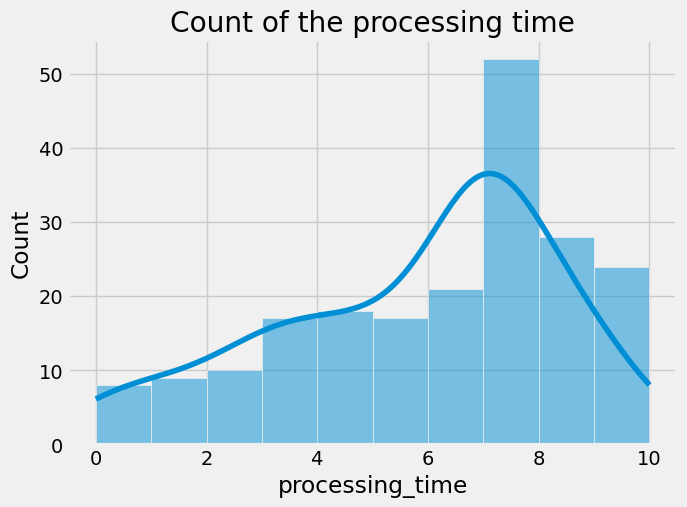

In [70]:
plt.figure(figsize= (7, 5))
plt.title('Count of the processing time')
sns.histplot(data= df_intern_scan, x= 'processing_time', binwidth=1, kde= True);

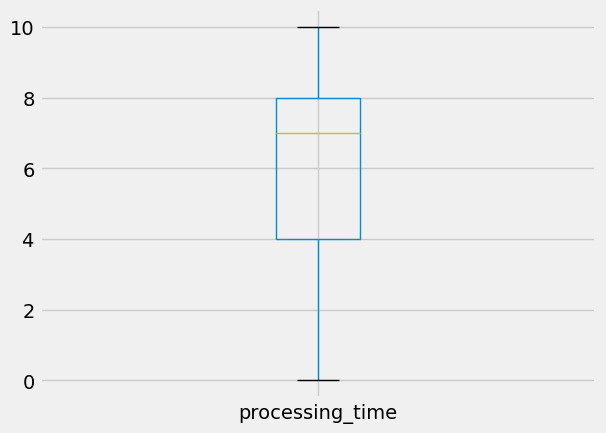

In [71]:
df_intern_scan.boxplot(column= 'processing_time');

Delivery exceptions: This KPI measures the number of times a delivery exception occurs, such as a failed delivery attempt or a delayed delivery.

In [72]:
df_cd.drop_duplicates(["order_id"], inplace=True)
df_cd

,order_id,arrival_scan_date,customer_name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron
2,CA-2019-130001,2019-05-03,Heather Kirkland
3,CA-2019-113061,2019-05-06,Ed Ludwig
4,CA-2019-162138,2019-05-06,Grace Kelly
...,...,...,...
328,CA-2020-129707,2020-05-08,Larry Hughes
329,CA-2020-125381,2020-05-08,Speros Goranitis
330,CA-2020-141733,2020-05-15,Rick Wilson
331,US-2020-104451,2020-05-15,Michelle Moray


In [73]:
df_order_duplicate = df_order.copy()
df_order_duplicate.drop_duplicates(["order_id"], inplace=True)
df_order_duplicate.shape

(5009, 12)

In [75]:
df_order_cd = df_order_duplicate.merge(df_cd, how= 'right', on= 'order_id')
df_order_cd['ship_mode_numeric'] = np.where(df_order_cd['ship_mode'] == 'First Class', 1, 0)
display(df_order_cd.head(2))
display(df_order_cd.shape)
display(df_order_cd.info())
display(df_order_cd.ship_mode.unique())

,index,order_id,order_date,ship_mode,state,category,sub_category,product_id,sales,quantity,discount,profit,arrival_scan_date,customer_name,ship_mode_numeric
0,7111,CA-2019-109666,2019-04-19,Standard Class,New York,Power Muesli,Hunger Buster,OFF-SU-10002522,7.760,2,0.0,2.2504,2019-05-03,Kunst Miller,0
1,3235,CA-2019-138933,2019-04-24,First Class,California,Power Muesli,Super Fibre Boost,OFF-BI-10003355,3.984,1,0.2,1.3944,2019-05-03,Jack Lebron,1


(333, 15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              333 non-null    int64         
 1   order_id           333 non-null    object        
 2   order_date         333 non-null    datetime64[ns]
 3   ship_mode          333 non-null    object        
 4   state              333 non-null    object        
 5   category           333 non-null    object        
 6   sub_category       333 non-null    object        
 7   product_id         333 non-null    object        
 8   sales              333 non-null    float64       
 9   quantity           333 non-null    int64         
 10  discount           333 non-null    float64       
 11  profit             333 non-null    float64       
 12  arrival_scan_date  333 non-null    datetime64[ns]
 13  customer_name      333 non-null    object        
 14  ship_mode_

None

array(['Standard Class', 'First Class', 'Second Class'], dtype=object)

In [77]:
df_order_cd['is_express_cd'] = df_order_cd['ship_mode'].apply(lambda x: 1 if x == 'Express' else 0)

In [ ]:
""" 
This code calculates several key performance indicators (KPIs)
for both the warehouse and logistics processes.
It calculates the average delivery time to logistics company and to the customer,
the number of delivery exceptions for both processes
and visualizes them using several plots, such as bar plots, histograms, and box plots.

Additionally, the code shows the distribution of processing time and shipping modes in the merged dataframe.
The purpose of the code is to provide insights and recommendations to improve the warehouse and logistics processes,
as well as to track the progress over time.

"""

The average delivery time to customer is: 7.053333333333334 days
The number of delivery exceptions for Logistics process is: 73


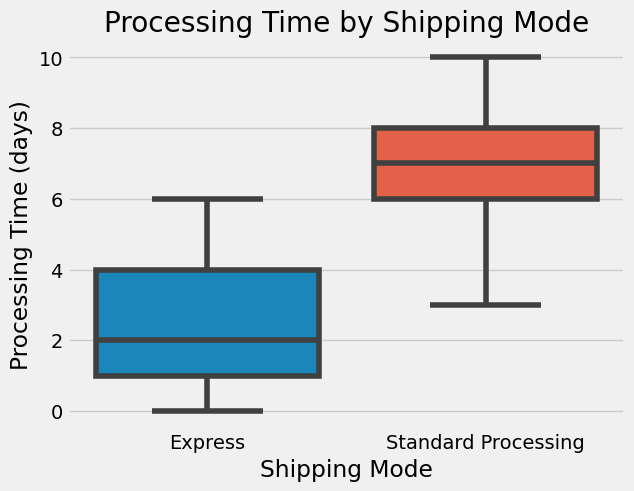

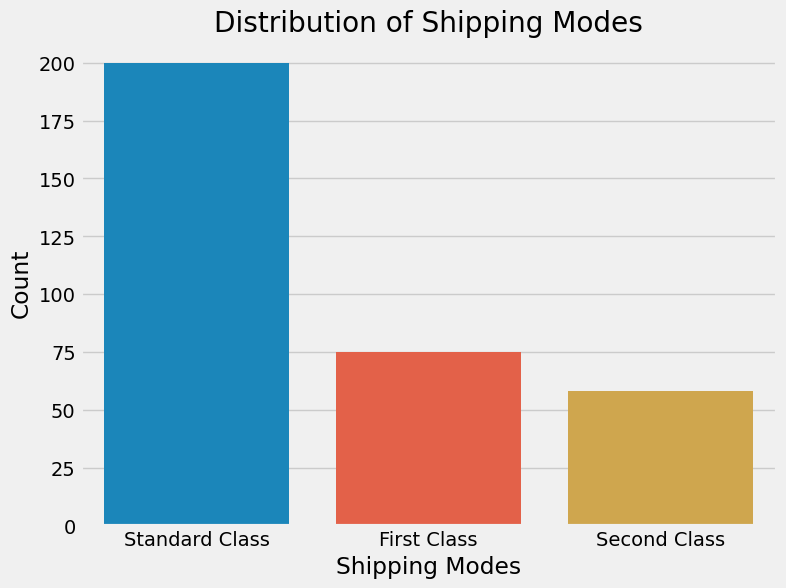

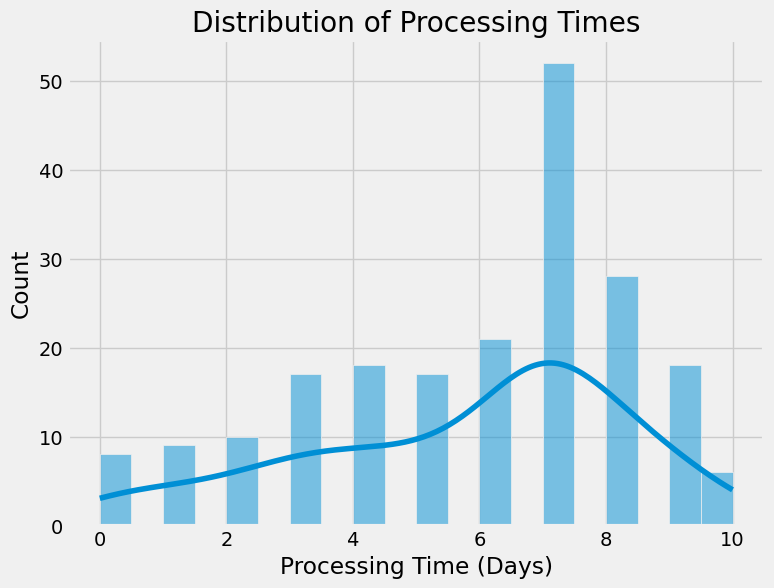

In [78]:
# Calculate the average delivery time to customer
avg_delivery_time_whole = (df_order_cd[df_order_cd['ship_mode'] == 'First Class']['arrival_scan_date'] - df_order_cd[df_order_cd['ship_mode'] == 'First Class']['order_date']).dt.days.mean()

# Calculate the number of delivery exceptions for Logistics process
exceptions_logistics = df_order_cd[(df_order_cd['ship_mode'] == 'First Class') & (df_order_cd['arrival_scan_date'] - df_order_cd['order_date'] > pd.Timedelta(days=3))].shape[0]

# Print the results
print("The average delivery time to customer is: {} days".format(avg_delivery_time_whole))
print("The number of delivery exceptions for Logistics process is: {}".format(exceptions_logistics))


# Visualize the relationship between processing time and shipping mode
sns.boxplot(x='ship_mode', y='processing_time', data=df_intern_scan)
plt.title('Processing Time by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Processing Time (days)')
plt.show()

# Bar plot showing the distribution of shipping modes in the merged dataframe 
plt.figure(figsize=(8,6))
sns.countplot(x='ship_mode', data=df_order_cd)
plt.title('Distribution of Shipping Modes')
plt.xlabel('Shipping Modes')
plt.ylabel('Count')
plt.show()

# Histogram showing the distribution of processing times in the merged dataframe 
plt.figure(figsize=(8,6))
sns.histplot(x='processing_time', data=df_intern_scan, bins=20, kde= True)
plt.title('Distribution of Processing Times')
plt.xlabel('Processing Time (Days)')
plt.ylabel('Count')
plt.show()



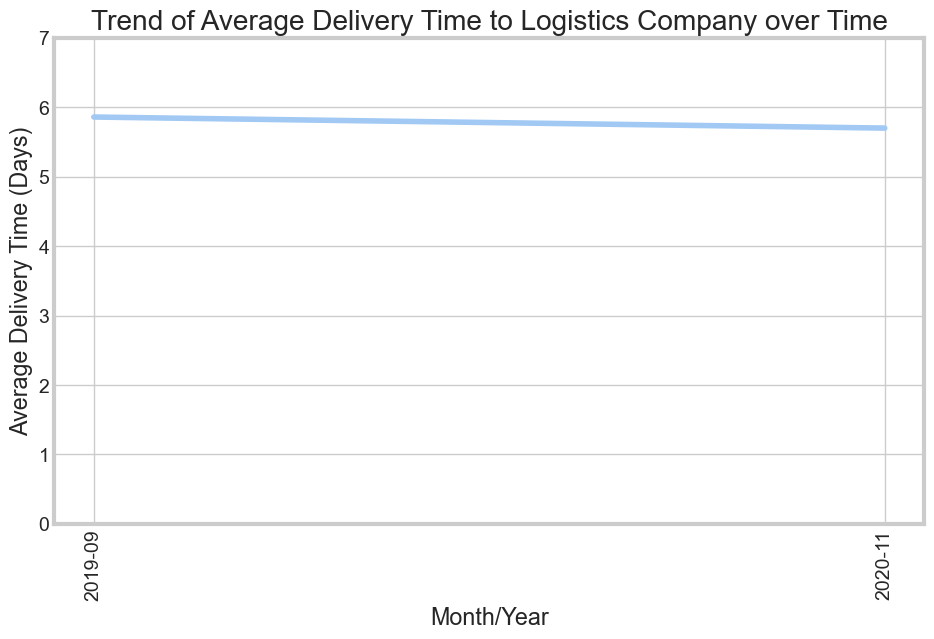

In [ ]:
# Line plot showing the trend of average delivery time to logistics company over time


df_intern_scan['month_year'] = pd.to_datetime(df_intern_scan['order_date']).dt.to_period('M')

df_lc_trend = df_intern_scan.groupby(['month_year'])['processing_time'].mean().reset_index()
df_lc_trend['month_year'] = df_lc_trend['month_year'].astype(str)


df_lc_trend['processing_time'] = df_lc_trend['processing_time'].astype('float64')

plt.figure(figsize=(10,6))
sns.lineplot(x='month_year', y='processing_time', data=df_lc_trend)
plt.title('Trend of Average Delivery Time to Logistics Company over Time')
plt.xlabel('Month/Year')
plt.ylabel('Average Delivery Time (Days)')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 8, step=1))
plt.show()

The average delivery time to logistics company is: 7.0918803418803416 days
The number of delivery exceptions for Warehouse process is: 2698


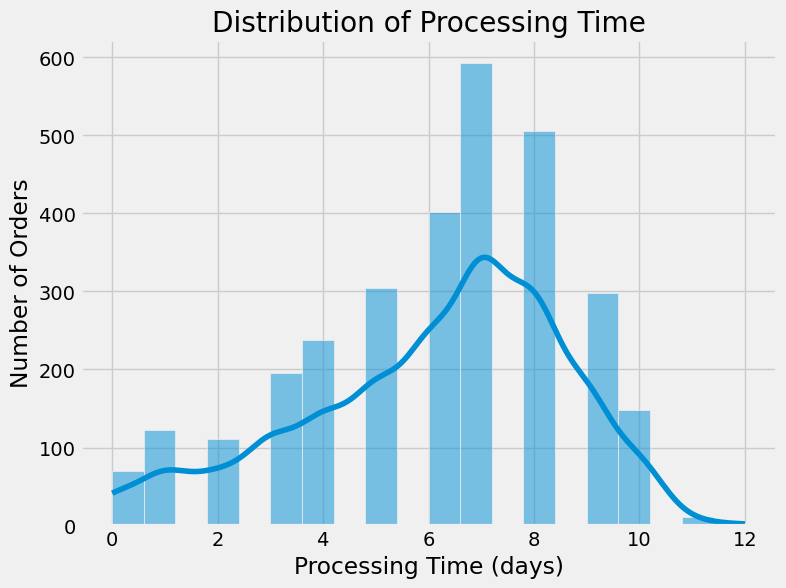

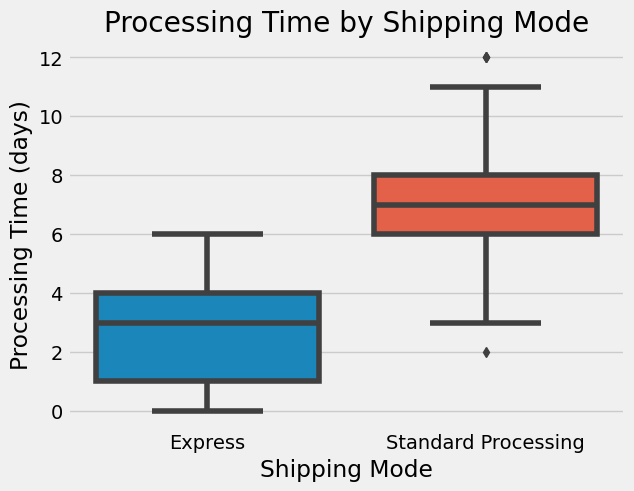

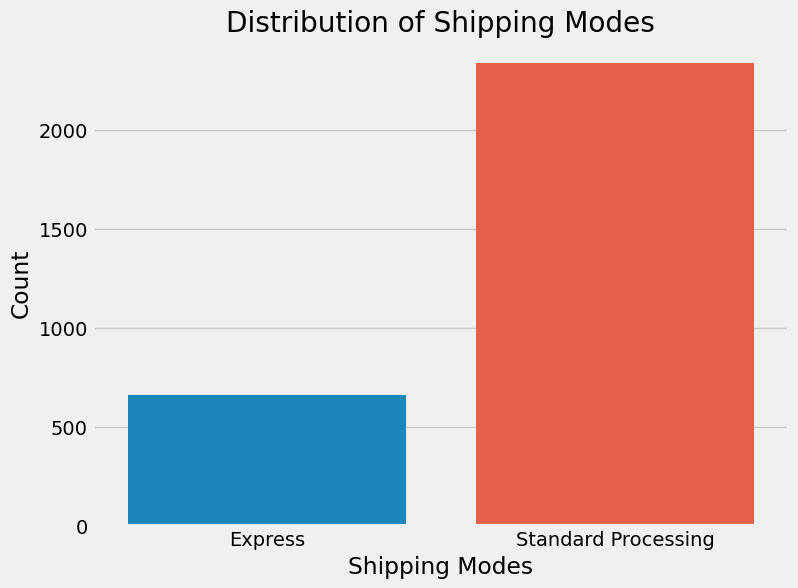

In [81]:
# Calculate the average delivery time to logistics company
df_scan['on_truck_scan_date'] = pd.to_datetime(df_scan['on_truck_scan_date'])
df_scan['order_date'] = pd.to_datetime(df_scan['order_date'])
avg_delivery_time_to_lc = (df_scan[df_scan['ship_mode'] != 'Express']['on_truck_scan_date'] - df_scan[df_scan['ship_mode'] != 'Express']['order_date']).dt.days.mean()

# Calculate the number of delivery exceptions for the warehouse process
exceptions_warehouse = df_scan[(df_scan['on_truck_scan_date'] - pd.to_datetime(df_scan['order_date'])) > pd.Timedelta(days=2)].shape[0]

# Print the results
print("The average delivery time to logistics company is: {} days".format(avg_delivery_time_to_lc))
print("The number of delivery exceptions for Warehouse process is: {}".format(exceptions_warehouse))

# Visualize the distribution of processing time
plt.figure(figsize=(8, 6))
sns.histplot((df_scan['on_truck_scan_date'] - df_scan['order_date']).dt.days, kde=True, bins=20)
plt.title('Distribution of Processing Time')
plt.xlabel('Processing Time (days)')
plt.ylabel('Number of Orders')
plt.show()


# Visualize the relationship between processing time and shipping mode
sns.boxplot(x='ship_mode', y=(df_scan['on_truck_scan_date'] - df_scan['order_date']).dt.days, data=df_scan)
plt.title('Processing Time by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Processing Time (days)')
plt.show()

# Bar plot showing the distribution of shipping modes
plt.figure(figsize=(8,6))
sns.countplot(x='ship_mode', data=df_scan)
plt.title('Distribution of Shipping Modes')
plt.xlabel('Shipping Modes')
plt.ylabel('Count')
plt.show()


In [82]:
df_intern.columns

Index(['order_id', 'ready_to_ship_date', 'pickup_date'], dtype='object')

Summary Statistics for Pickup Delay:
count    204.000000
mean       1.573529
std        0.951786
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: pickup_delay, dtype: float64


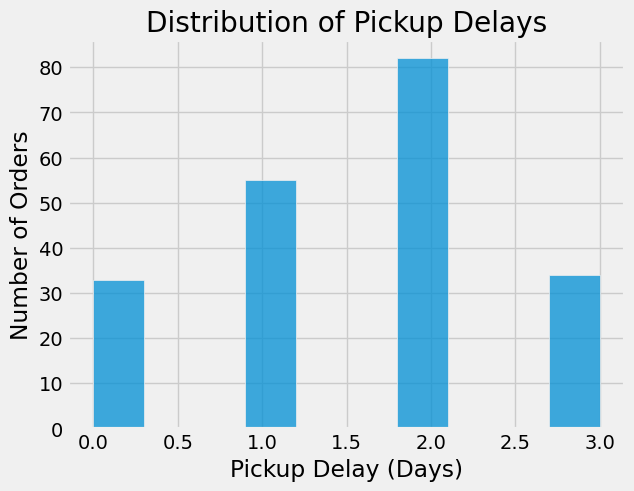

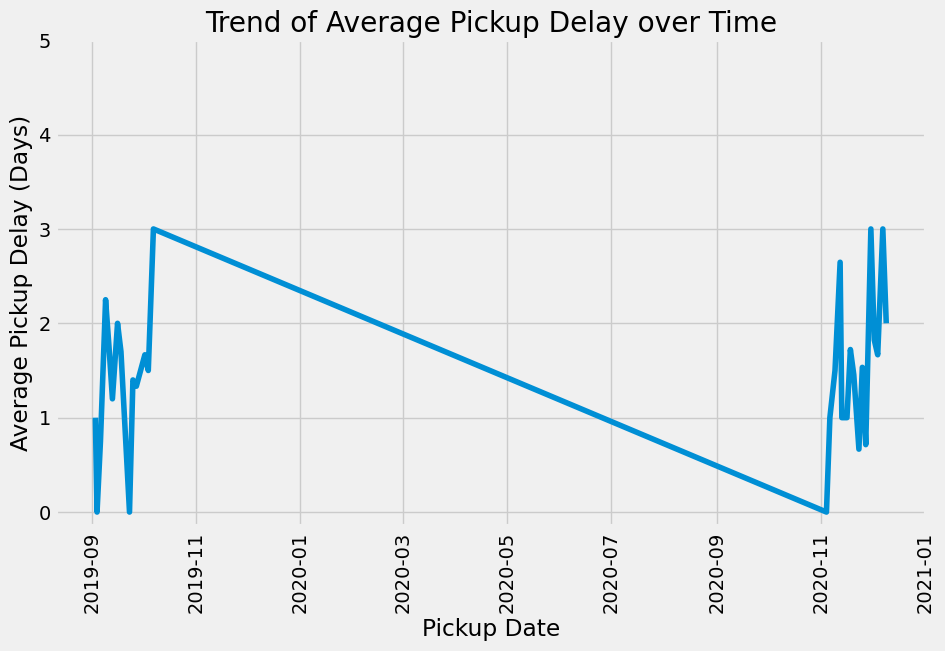

In [85]:
# Calculate the pickup delay for each order
df_intern['pickup_delay'] = (df_intern['pickup_date'] - df_intern['ready_to_ship_date']).dt.days

# Print summary statistics
print("Summary Statistics for Pickup Delay:\n{}".format(df_intern['pickup_delay'].describe()))

# Visualize the distribution of pickup delays
sns.histplot(df_intern['pickup_delay'], kde=False, bins=10)
plt.title('Distribution of Pickup Delays')
plt.xlabel('Pickup Delay (Days)')
plt.ylabel('Number of Orders')
plt.show()

# Visualize the average pickup delay by date
df_pickup_trend = df_intern.groupby(['pickup_date'])['pickup_delay'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x='pickup_date', y='pickup_delay', data=df_pickup_trend)
plt.title('Trend of Average Pickup Delay over Time')
plt.xlabel('Pickup Date')
plt.ylabel('Average Pickup Delay (Days)')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 6, step=1))
plt.show()


## Extra Credit

#### 95th percentile

In [86]:
delivery_time = (df_order_cd['arrival_scan_date'] - df_order_cd['order_date']).dt.days
pct_95 = delivery_time.quantile(0.95)
print('95th percentile of delivery time: {} days'.format(pct_95))

95th percentile of delivery time: 15.0 days


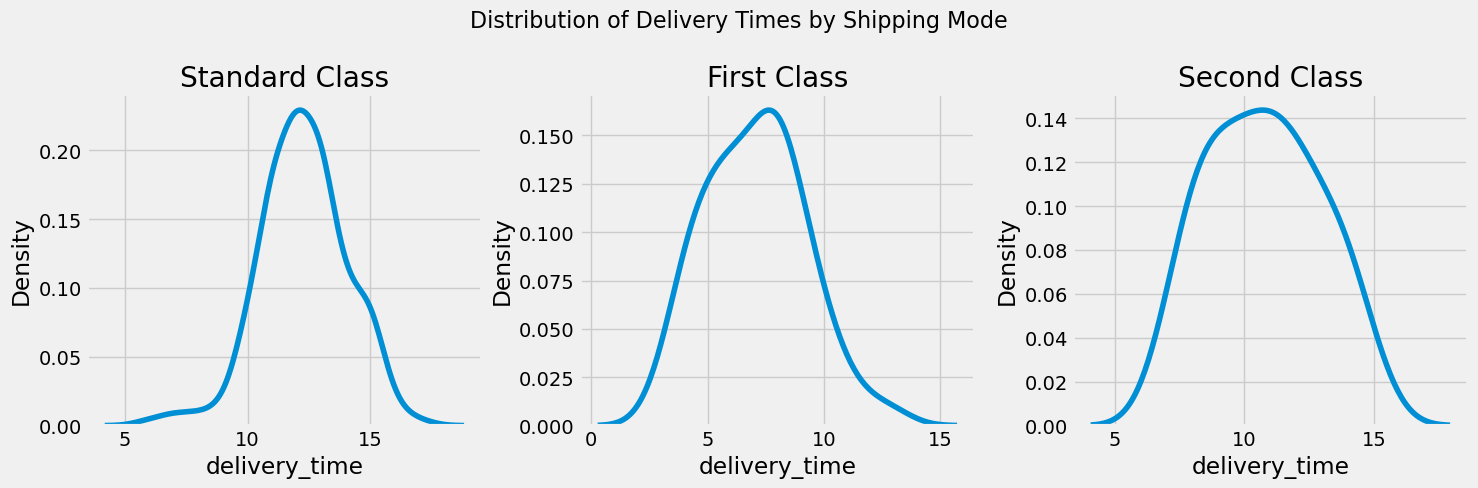

In [88]:
# Filter for non-express shipping modes
df_order_cd_filtered = df_order_cd[df_order_cd['ship_mode'] != 'Express']

# Calculate delivery time
df_order_cd_filtered['delivery_time'] = (df_order_cd_filtered['arrival_scan_date'] - df_order_cd_filtered['order_date']).dt.days

# Create subplots
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

# Create a density plot for each shipping mode
for i, mode in enumerate(df_order_cd_filtered['ship_mode'].unique()):
    sns.kdeplot(df_order_cd_filtered[df_order_cd_filtered['ship_mode'] == mode]['delivery_time'], ax=axs[i])
    axs[i].set_title(mode)

# Add overall title
fig.suptitle('Distribution of Delivery Times by Shipping Mode', fontsize=16)

# Adjust spacing between subplots
fig.tight_layout()